In [25]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load dataset
df_reg = pd.read_csv('https://raw.githubusercontent.com/febbisena/DataMining/refs/heads/main/Concrete%20Compressive%20Strength.csv')
print(df_reg.head())

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age (day)  Concrete compressive strength   
0            1040.0           676.0         28                       79.986111  
1            1055.0           676.0         28                       61.887366  
2             932.0           594.0        270                       40.269535  
3             932.0           594.0        365                       41.052780  
4             978.4           825.5        360                       44.296075  


In [27]:
# Dataset info
df_reg.info()
print("\nMissing values:\n", df_reg.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB

Missing values:
 Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplast

In [28]:
# Split features and target
X = df_reg.drop('Concrete compressive strength ', axis=1)
y = df_reg['Concrete compressive strength ']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\nTraining data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 772
Testing data size: 258


In [29]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 30.32
R-squared (R²): 0.89


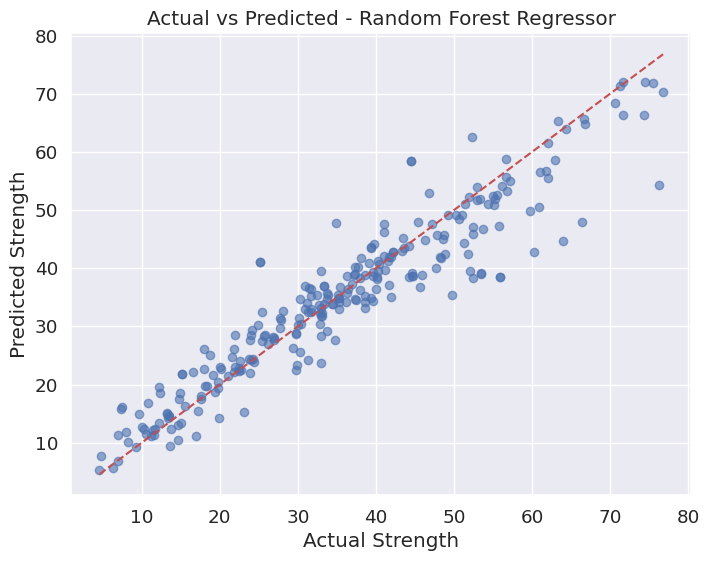

In [30]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted - Random Forest Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

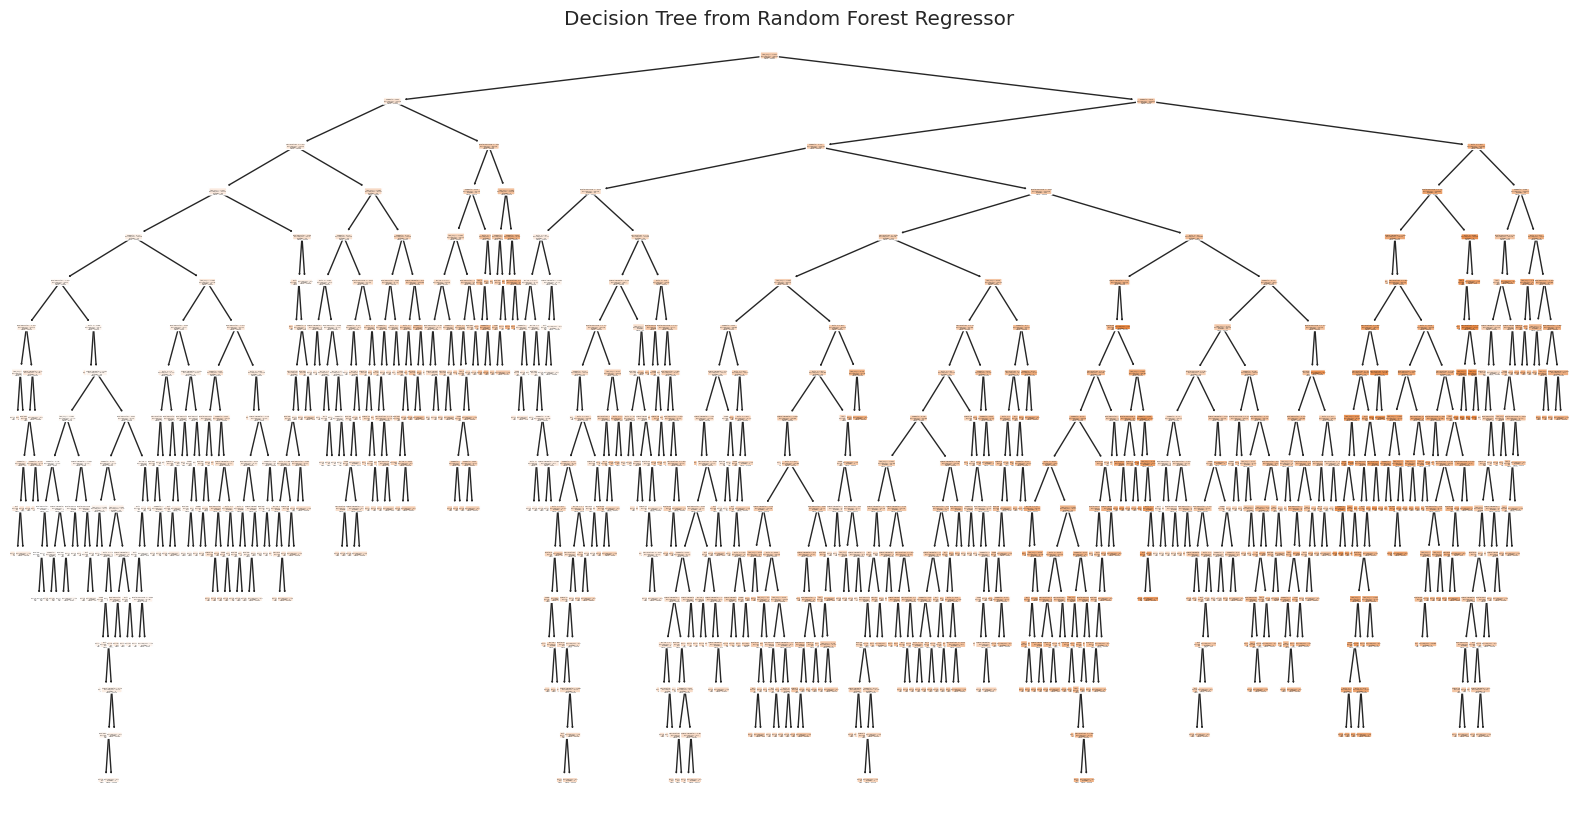

In [31]:
# Visualize a Decision Tree from the Random Forest
plt.figure(figsize=(20, 10))
estimator = rf_regressor.estimators_[0]
tree.plot_tree(estimator, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree from Random Forest Regressor")
plt.show()